In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [11]:
def getCSV(csv):
    dfl = pd.read_csv(csv)
    return dfl
df = getCSV(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\ForestCover.csv') 
print(df)

                                      Statistic Label  Year         County  \
0                     Extent of Forests and Woodlands  2021     Co. Carlow   
1                     Extent of Forests and Woodlands  2021      Co. Cavan   
2                     Extent of Forests and Woodlands  2021      Co. Clare   
3                     Extent of Forests and Woodlands  2021       Co. Cork   
4                     Extent of Forests and Woodlands  2021    Co. Donegal   
5                     Extent of Forests and Woodlands  2021     Co. Dublin   
6                     Extent of Forests and Woodlands  2021     Co. Galway   
7                     Extent of Forests and Woodlands  2021      Co. Kerry   
8                     Extent of Forests and Woodlands  2021    Co. Kildare   
9                     Extent of Forests and Woodlands  2021   Co. Kilkenny   
10                    Extent of Forests and Woodlands  2021      Co. Laois   
11                    Extent of Forests and Woodlands  2021    C

In [12]:
filtered_df = df[df['Statistic Label'] == 'Extent of Forests and Woodlands (as a percent of total county area)']
print(filtered_df)

                                      Statistic Label  Year         County  \
27  Extent of Forests and Woodlands (as a percent ...  2021     Co. Carlow   
28  Extent of Forests and Woodlands (as a percent ...  2021      Co. Cavan   
29  Extent of Forests and Woodlands (as a percent ...  2021      Co. Clare   
30  Extent of Forests and Woodlands (as a percent ...  2021       Co. Cork   
31  Extent of Forests and Woodlands (as a percent ...  2021    Co. Donegal   
32  Extent of Forests and Woodlands (as a percent ...  2021     Co. Dublin   
33  Extent of Forests and Woodlands (as a percent ...  2021     Co. Galway   
34  Extent of Forests and Woodlands (as a percent ...  2021      Co. Kerry   
35  Extent of Forests and Woodlands (as a percent ...  2021    Co. Kildare   
36  Extent of Forests and Woodlands (as a percent ...  2021   Co. Kilkenny   
37  Extent of Forests and Woodlands (as a percent ...  2021      Co. Laois   
38  Extent of Forests and Woodlands (as a percent ...  2021    C

In [13]:
filtered_df['County'] = filtered_df['County'].apply(lambda x : x[4:].upper())

C:\Users\Tom\AppData\Local\Temp\ipykernel_17796\2240094288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['County'] = filtered_df['County'].apply(lambda x : x[4:].upper())


In [15]:
counties_shapefile = gpd.read_file(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\Ireland_Counties\Counties___Ungen_2019.shp')

In [16]:
merged_data = counties_shapefile.merge(filtered_df, how='left', left_on='ENGLISH', right_on='County')
print(merged_data)

    OBJECTID   CO_ID    ENGLISH            GAEILGE LOGAINM_ID  \
0          1   50000    DONEGAL       Dún na nGall     100013   
1          2  120000   LIMERICK          Luimneach     100022   
2          3   80000    KILDARE          Cill Dara     100007   
3          4  220000  WATERFORD        Port Láirge     100026   
4          5  260000     DUBLIN  Baile Átha Cliath     100002   
5          6  230000  WESTMEATH          An Iarmhí     100016   
6          7  170000   MONAGHAN         Muineachán     100025   
7          8  250000    WICKLOW      Cill Mhantáin     100008   
8          9   40000       CORK           Corcaigh     100010   
9         10   70000      KERRY            Ciarraí     100005   
10        11  190000  ROSCOMMON         Ros Comáin     100027   
11        12  240000    WEXFORD        Loch Garman     100019   
12        13  130000   LONGFORD        An Longfort     100020   
13        14  160000      MEATH             An Mhí     100024   
14        15   20000     

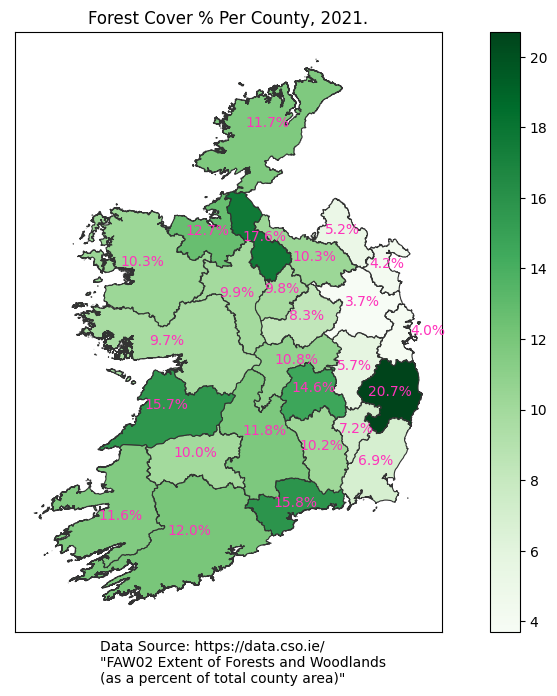

In [66]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map
merged_data.plot(column='VALUE', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.2', legend=True)

text_color = "#F3B"
font_size = 10
for idx, row in merged_data.iterrows():
    perc = row['VALUE']
    if row['County'] == "OFFALY":
        plt.annotate(text=str(perc)+"%", 
                 xy=(row['CENTROID_X']+40, row['CENTROID_Y']+7500),  # Assuming you have a 'centroid' column with Point geometries
                 color=text_color, 
                 fontsize=font_size,
                 ha='center')  # Adjust ha and va as needed
    elif row['County'] == "CORK":
        plt.annotate(text=str(perc)+"%", 
                 xy=(row['CENTROID_X']+16000, row['CENTROID_Y']+4000),  # Assuming you have a 'centroid' column with Point geometries
                 color=text_color, 
                 fontsize=font_size,
                 ha='center')  # Adjust ha and va as needed
    elif row['County'] == "KERRY":
        plt.annotate(text=str(perc)+"%", 
                 xy=(row['CENTROID_X']+17000, row['CENTROID_Y']-11000),  # Assuming you have a 'centroid' column with Point geometries
                 color=text_color, 
                 fontsize=font_size,
                 ha='center')  # Adjust ha and va as needed
    elif row['County'] == "KILKENNY":
        plt.annotate(text=str(perc)+"%", 
                 xy=(row['CENTROID_X']+4000, row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                 color=text_color, 
                 fontsize=font_size,
                 ha='center')  # Adjust ha and va as needed
    elif row['County'] == "DUBLIN":
        plt.annotate(text=str(perc)+"%", 
                 xy=(row['CENTROID_X']+24000, row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                 color=text_color, 
                 fontsize=font_size,
                 ha='center')  # Adjust ha and va as needed
    elif row['County'] == "CAVAN":
        plt.annotate(text=str(perc)+"%", 
                 xy=(row['CENTROID_X']+7000, row['CENTROID_Y']-8000),  # Assuming you have a 'centroid' column with Point geometries
                 color=text_color, 
                 fontsize=font_size,
                 ha='center')  # Adjust ha and va as needed
    elif row['County'] == "MEATH":
        plt.annotate(text=str(perc)+"%", 
                 xy=(row['CENTROID_X']+5000, row['CENTROID_Y']-2000),  # Assuming you have a 'centroid' column with Point geometries
                 color=text_color, 
                 fontsize=font_size,
                 ha='center')  # Adjust ha and va as needed
    elif row['County'] == "SLIGO":
        plt.annotate(text=str(perc)+"%", 
                 xy=(row['CENTROID_X'], row['CENTROID_Y']-4000),  # Assuming you have a 'centroid' column with Point geometries
                 color=text_color, 
                 fontsize=font_size,
                 ha='center')  # Adjust ha and va as needed
    elif row['County'] == "ROSCOMMON":
        plt.annotate(text=str(perc)+"%", 
                 xy=(row['CENTROID_X']+5000, row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                 color=text_color, 
                 fontsize=font_size,
                 ha='center')  # Adjust ha and va as needed
    elif row['County'] == "WESTMEATH":
        plt.annotate(text=str(perc)+"%", 
                 xy=(row['CENTROID_X']+4000, row['CENTROID_Y']-3000),  # Assuming you have a 'centroid' column with Point geometries
                 color=text_color, 
                 fontsize=font_size,
                 ha='center')  # Adjust ha and va as needed
    elif row['County'] == "LEITRIM":
        plt.annotate(text=str(perc)+"%", 
                 xy=(row['CENTROID_X']+5000, row['CENTROID_Y']-3000),  # Assuming you have a 'centroid' column with Point geometries
                 color=text_color, 
                 fontsize=font_size,
                 ha='center')  # Adjust ha and va as needed
    else:
        plt.annotate(text=str(perc)+"%", 
                     xy=(row['CENTROID_X'], row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                     color=text_color, 
                     fontsize=font_size, 
                     ha='center') 

ax.set_facecolor('#FFF') #
title_string = "Forest Cover % Per County, 2021."
ax.set_title(title_string)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

plt.subplots_adjust(left=0.1, right=0.90, top=0.90, bottom=0.15)
plt.text(0.2, -0.085, "Data Source: https://data.cso.ie/ \n\"FAW02 Extent of Forests and Woodlands \n(as a percent of total county area)\"", ha='left', transform=ax.transAxes)

plt.savefig('ForestCover-2021.png', bbox_inches='tight')

plt.show()